In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from dagmm_INSE_6180 import DAGMM

# Experiement 1

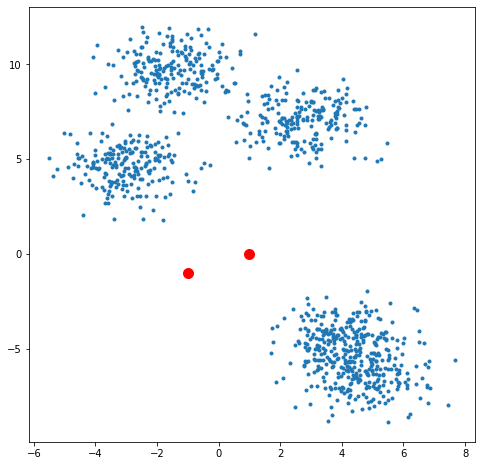

In [2]:
# Generate synthetic data

data, _ = make_blobs(n_samples=1000, n_features=5, centers=5, random_state=123)

#%%

data[300] = [-1, -1, -1, -1, -1]
data[500] = [ 1,  0,  1,  1,  1]
ano_index = [300, 500]

#%% md

### Scatter plot
# Red Points are mixed "Outliers"

#%%

plt.figure(figsize=[8,8])
plt.plot(data[:,0], data[:,1], ".")
plt.plot(data[ano_index,0], data[ano_index,1], "o", c="r", markersize=10)
plt.show()


In [7]:
# Define and fit the dagmm model

model_dagmm = DAGMM(comp_hiddens=[16,8,1], comp_activation="elu",
                  est_hiddens=[15, 3], est_activation="elu", est_dropout_ratio=0.2,
                  n_epochs=20, batch_size=32, normalize=True)

model_dagmm.build(data)
model_dagmm.fit(data)

C:\Users\travi\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1000/1000 [==============================] - mean_loss: 6.1519 - val_loss: 3.3549
Best Epoch: 1
Epoch 2/20
1000/1000 [==============================] - mean_loss: 3.3070 - val_loss: 1.5520
Best Epoch: 2
Epoch 3/20
1000/1000 [==============================] - mean_loss: 2.0179 - val_loss: 0.7188
Best Epoch: 3
Epoch 4/20
1000/1000 [==============================] - mean_loss: 1.6772 - val_loss: 0.5424
Best Epoch: 4
Epoch 5/20
1000/1000 [==============================] - mean_loss: 1.4535 - val_loss: 0.4894
Best Epoch: 5
Epoch 6/20
1000/1000 [==============================] - mean_loss: 1.3044 - val_loss: 0.4634
Best Epoch: 6
Epoch 7/20
1000/1000 [==============================] - mean_loss: 1.2486 - val_loss: 0.4361
Best Epoch: 7
Epoch 8/20
1000/1000 [==============================] - mean_loss: 1.1986 - val_loss: 0.4376
Best Epoch: 7
Epoch 9/20
1000/1000 [==============================] - mean_loss: 1.1702 - val_loss: 0.4430
Best Epoch: 7
Epoch 10/20
1000/1000 [==============

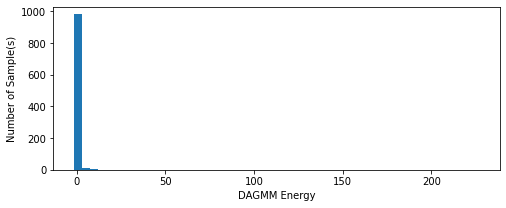

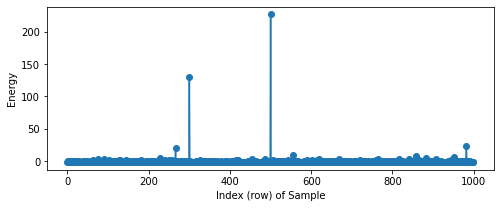

In [6]:
# Calculate the energy of data samples and visualize the result

energy = model_dagmm.predict(data)

#%%

plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")
plt.show()
#%%

plt.figure(figsize=[8,3])
plt.plot(energy, "o-")
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")
plt.show()